# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

  - **Summary of Basic Statistics**:

    Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
    Include a concise table or summary showcasing these measures for easy reference.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

### Lets Begin with the solution.

### Import Libraries

In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize
from collections import Counter
from scipy.stats import binom
from scipy.stats import geom
import math
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import linregress
from datetime import datetime
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [ ]:
# File ID from the shareable link
file_id = '14-F051Lz1oDGVFWbcL6VBbFTXisnSQJJ'
# URL to the file
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'data.csv'
gdown.download(url, output)

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Display the DataFrame
df.head()

Downloading...
From: https://drive.google.com/uc?id=14-F051Lz1oDGVFWbcL6VBbFTXisnSQJJ
To: /content/data.csv
100%|██████████| 184k/184k [00:00<00:00, 72.4MB/s]


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# View basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##Task 1 - Basic CleanUp

In [ ]:
#Check for Missing Values
print(df.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


Observations

Column Data Types:
Most columns have appropriate data types (int64, float64, object).
Dt_Customer (likely a date column) is currently of type object and may need to be converted to a datetime type.

Missing Values:
The Income column has 24 missing values (2240 total rows, but 2216 non-null entries).


###Handle Missing Values

In [ ]:
# Check for skewness
skewness = df['Income'].skew()
print(f"Skewness of Income: {skewness}")

Skewness of Income: 6.763487372811116


In [ ]:
df['Income'].fillna(df['Income'].median(), inplace=True)

# Check if there are any missing values left
print(df.isnull().sum())

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64


<ipython-input-6-6402bdacc3ab>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


###Converting Dt_Customer to Datetime

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].head())

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-11-05
4   2014-08-04
Name: Dt_Customer, dtype: datetime64[ns]


##Task 2 - Descriptive Statistics

###Calculate Central Tendency (Mean, Median, Mode)

In [ ]:
# Mean, Median, and Mode for relevant columns
central_tendency = df[["Income", "Kidhome", "Teenhome", "Recency",
                       "MntWines", "MntFruits", "MntMeatProducts",
                       "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                       "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                       "NumStorePurchases", "NumWebVisitsMonth"]].agg(['mean', 'median', lambda x: x.mode()[0]])

# Rename the third row for clarity
central_tendency.rename(index={'<lambda>': 'mode'}, inplace=True)

central_tendency

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
mean,52237.975446,0.444196,0.50625,49.109375,303.935714,26.302232,166.95,37.525446,27.062946,44.021875,2.325,4.084821,2.662054,5.790179,5.316518
median,51381.500000,0.000000,0.00000,49.000000,173.500000,8.000000,67.00,12.000000,8.000000,24.000000,2.000,4.000000,2.000000,5.000000,6.000000
mode,51381.500000,0.000000,0.00000,56.000000,2.000000,0.000000,7.00,0.000000,0.000000,1.000000,1.000,2.000000,0.000000,3.000000,7.000000


###Calculate Dispersion (Variance, Standard Deviation)

In [ ]:
# Variance and Standard Deviation for relevant columns
dispersion = df[["Income", "Kidhome", "Teenhome", "Recency",
                 "MntWines", "MntFruits", "MntMeatProducts",
                 "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                 "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                 "NumStorePurchases", "NumWebVisitsMonth"]].agg(['var', 'std'])

dispersion

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
var,6.268992e+08,0.289873,0.296522,838.823673,113297.804709,1581.926033,50947.429388,2984.325391,1704.079555,2721.441683,3.733542,7.721252,8.544517,10.568729,5.888606
std,2.503796e+04,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645


In [ ]:
###Detect Outliers Using Z-scores

In [ ]:
# Calculate Z-scores for relevant columns
z_scores = df[["Income", "Kidhome", "Teenhome", "Recency",
               "MntWines", "MntFruits", "MntMeatProducts",
               "MntFishProducts", "MntSweetProducts", "MntGoldProds",
               "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
               "NumStorePurchases", "NumWebVisitsMonth"]].apply(zscore)

# Identify rows with absolute Z-scores > 3 (potential outliers)
outliers = (z_scores > 3).sum()

outliers

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,66
MntMeatProducts,54
MntFishProducts,60
MntSweetProducts,66
MntGoldProds,49


### Outlier Treatment (Winsorization)

In [ ]:
# Columns to treat for outliers
columns_to_treat = ["Income", "MntWines", "MntFruits", "MntMeatProducts",
                     "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                     "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
                     "NumWebVisitsMonth"]

# Calculate the 1st and 99th percentiles
percentiles = df[columns_to_treat].quantile([0.01, 0.99])

# Apply capping
for col in columns_to_treat:
    lower_bound, upper_bound = percentiles.loc[0.01, col], percentiles.loc[0.99, col]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify outlier mitigation
z_scores_after_capping = df[columns_to_treat].apply(zscore)
outliers_after_capping = (z_scores_after_capping > 3).sum()

outliers_after_capping


,0
Income,0
MntWines,0
MntFruits,66
MntMeatProducts,54
MntFishProducts,60
MntSweetProducts,66
MntGoldProds,49
NumDealsPurchases,46
NumWebPurchases,0
NumCatalogPurchases,0


###Task 3 - Probability Distributions

### Binomial Distribution

In [ ]:
# Applying Bionomial distribution on Response and Complain column

# Calculate probability of success (p) for Response and Complain
p_response = df['Response'].mean()
p_complain = df['Complain'].mean()

print(f"Probability of success for Response: {p_response}")
print(f"Probability of success for Complain: {p_complain}")


Probability of success for Response: 0.14910714285714285
Probability of success for Complain: 0.009375


In [ ]:
# Number of observations
n = len(df)

# Calculate expected value (E[X]) for both Response and Complain
E_response = n * p_response
E_complain = n * p_complain

print(f"Expected number of successes for Response: {E_response}")
print(f"Expected number of successes for Complain: {E_complain}")


Expected number of successes for Response: 334.0
Expected number of successes for Complain: 21.0


### Summary of Binomial Distribution Analysis:
In this analysis, we identified two binary variables, Response and Complain, which are suitable for modeling using a Binomial Distribution as they represent two possible outcomes (success/failure).

Response indicates whether a customer responded to a marketing campaign, and Complain reflects whether a customer registered a complaint.

The probability of success (p) for each variable was calculated as the proportion of successes (1s) in the dataset.

Using the total number of observations (n) and the probability of success, the expected number of successes (E[X]) was determined.

This analysis provides insights into customer behavior, helping predict the likelihood of responses to campaigns and the level of dissatisfaction among customers.

### Normal Distribution

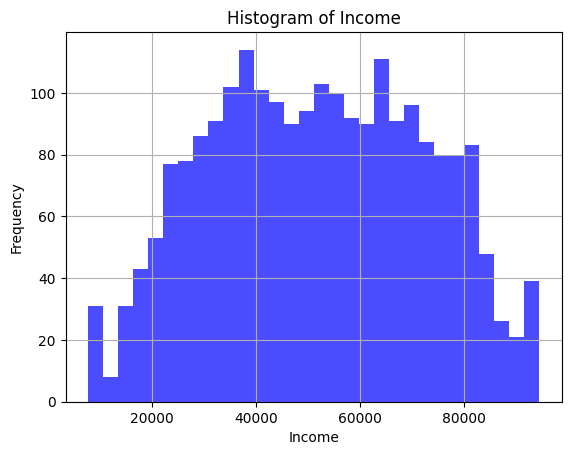

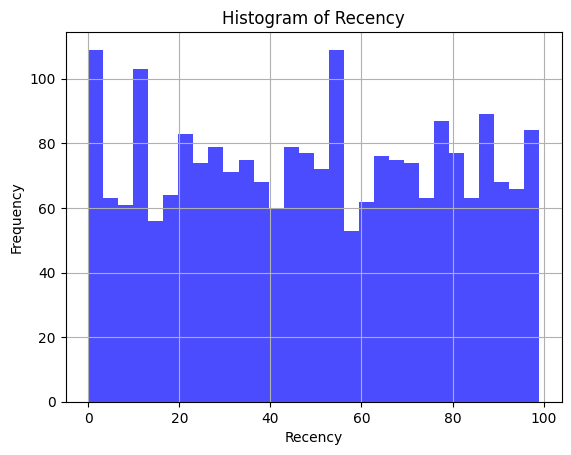

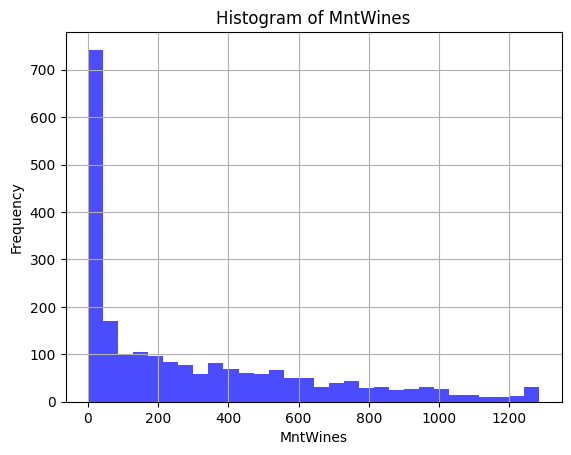

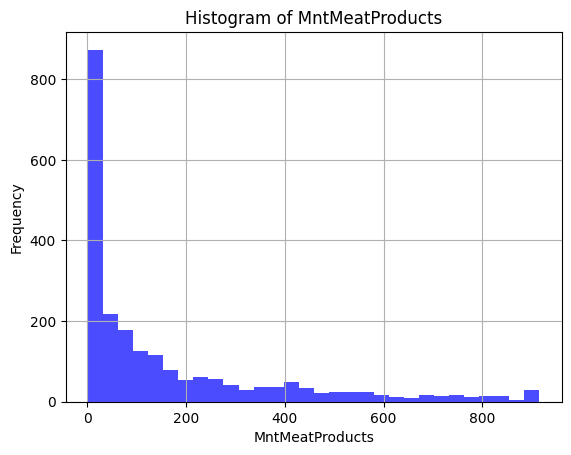

In [ ]:
import matplotlib.pyplot as plt

# Continuous variables to check
continuous_columns = ['Income', 'Recency', 'MntWines', 'MntMeatProducts']

# Plot histograms
for col in continuous_columns:
    plt.figure()
    df[col].dropna().hist(bins=30, alpha=0.7, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
from scipy.stats import shapiro

# Continuous variables to test
continuous_columns = ['Income', 'Recency', 'MntWines', 'MntMeatProducts']

# Perform Shapiro-Wilk test
for col in continuous_columns:
    stat, p_value = shapiro(df[col].dropna())
    print(f"{col}: Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print(f"{col} likely follows a Normal Distribution.\n")
    else:
        print(f"{col} does NOT follow a Normal Distribution.\n")


Income: Test Statistic = 0.9822, p-value = 0.0000
Income does NOT follow a Normal Distribution.

Recency: Test Statistic = 0.9541, p-value = 0.0000
Recency does NOT follow a Normal Distribution.

MntWines: Test Statistic = 0.8383, p-value = 0.0000
MntWines does NOT follow a Normal Distribution.

MntMeatProducts: Test Statistic = 0.7455, p-value = 0.0000
MntMeatProducts does NOT follow a Normal Distribution.



###Summary for Normal Distribution Analysis:
After testing for normality using the Shapiro-Wilk test, none of the selected continuous variables (Income, Recency, MntWines, and MntMeatProducts) follow a Normal Distribution. This indicates that these variables are not symmetrically distributed and may require alternative statistical approaches or transformations for further analysis.



### Poisson Distribution

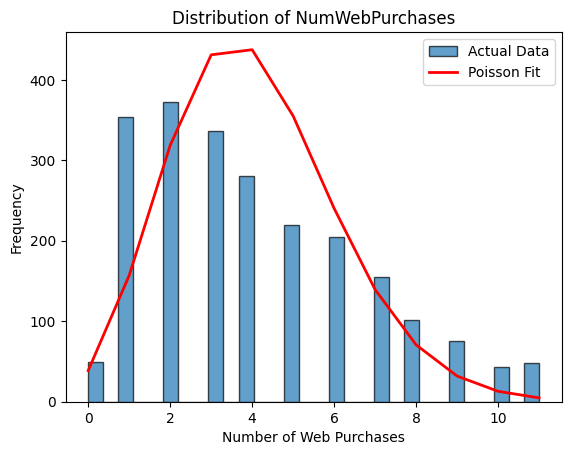

Probability of observing exactly 3 web purchases: 0.1924


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Assuming df is your dataframe
# Example: Using the 'NumWebPurchases' column for Poisson modeling

# Calculate the mean (λ) for NumWebPurchases
lambda_ = df['NumWebPurchases'].mean()  # Mean of the column

# Plotting histogram to visualize the distribution of the data
plt.hist(df['NumWebPurchases'], bins=30, edgecolor='black', alpha=0.7, label='Actual Data')
plt.title('Distribution of NumWebPurchases')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Frequency')

# Plot the Poisson distribution fit
x_values = np.arange(0, df['NumWebPurchases'].max() + 1)
poisson_values = poisson.pmf(x_values, lambda_)
plt.plot(x_values, poisson_values * len(df), 'r-', label='Poisson Fit', lw=2)

plt.legend()
plt.show()

# Calculate the probability of observing 3 purchases (for example)
k = 3
probability_3_purchases = poisson.pmf(k, lambda_)
print(f"Probability of observing exactly 3 web purchases: {probability_3_purchases:.4f}")


### Poisson Distribution Analysis for Web Purchases
Objective: Model the count of web purchases (NumWebPurchases) using the Poisson distribution to understand event frequencies.

Approach:

Calculate λ (Mean): The mean of NumWebPurchases represents the average number of purchases.

Visualization: A histogram of NumWebPurchases is plotted alongside the theoretical Poisson distribution for comparison.

Probability Calculation: The probability of observing a specific number of purchases (e.g., 3) is calculated using the Poisson PMF.

Conclusion: This analysis helps forecast purchase events and optimize strategies by modeling the frequency of web purchases as a Poisson process.



### Binomial Distribution

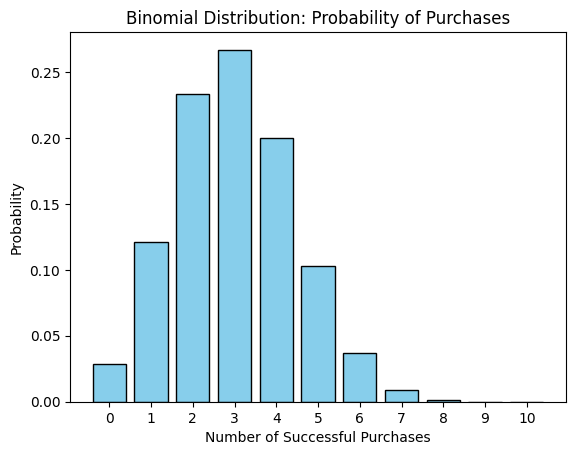

Probability of exactly 3 purchases: 0.2668


In [ ]:

# Parameters
n = 10  # number of trials (customers)
p = 0.3  # probability of success (making a purchase)

# Values for number of successes (from 0 to n)
x_values = np.arange(0, n + 1)

# Binomial probability mass function (PMF)
binom_values = binom.pmf(x_values, n, p)

# Plotting the distribution
plt.bar(x_values, binom_values, color='skyblue', edgecolor='black')
plt.title('Binomial Distribution: Probability of Purchases')
plt.xlabel('Number of Successful Purchases')
plt.ylabel('Probability')
plt.xticks(x_values)
plt.show()

# Probability of exactly 3 purchases (successes)
k = 3
probability_3_purchases = binom.pmf(k, n, p)
print(f"Probability of exactly 3 purchases: {probability_3_purchases:.4f}")


Binomial Distribution for Web Purchases

Objective: To model the number of successful web purchases using the Binomial distribution. This distribution is useful for situations where there are a fixed number of trials with two possible outcomes (success or failure).

Approach:

We modeled the scenario of 10 customers (n = 10), where each customer has a 30% chance (p = 0.3) of making a purchase.

We calculated the probability of observing a specific number of successful purchases out of the 10 customers using the Binomial probability mass function (PMF).

A bar chart was created to visualize the probability distribution for the number of successful purchases.

Conclusion: This analysis provides insights into the likelihood of a certain number of successful purchases, helping in decision-making and forecasting.



### Insights and Customer Segmentation

> Add blockquote



    Income  Total_Spend  Children  Age
0  84835.0      1178.22         0   54
1  57091.0       577.00         0   63
2  67267.0       251.00         1   66
3  32474.0        12.00         2   57
4  21474.0        91.00         1   35
Correlation Matrix:
                Income  Total_Spend       Age   Recency  Children
Income       1.000000     0.815761  0.206015  0.006234 -0.347575
Total_Spend  0.815761     1.000000  0.114078  0.021490 -0.499112
Age          0.206015     0.114078  1.000000  0.019871  0.090199
Recency      0.006234     0.021490  0.019871  1.000000  0.018053
Children    -0.347575    -0.499112  0.090199  0.018053  1.000000


<ipython-input-27-816c8d9baece>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Marital_Status', y='Total_Spend', ci=None)


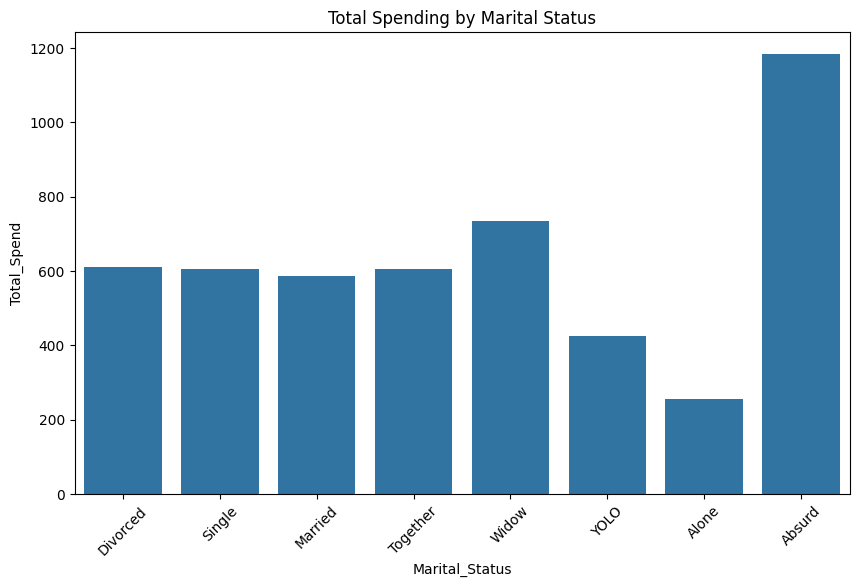

<ipython-input-27-816c8d9baece>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Education', y='Total_Spend', ci=None)


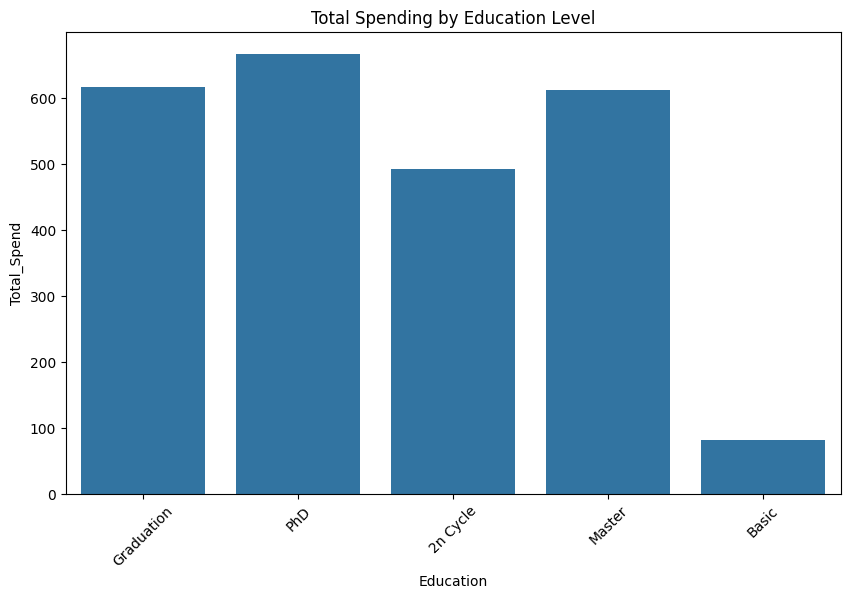

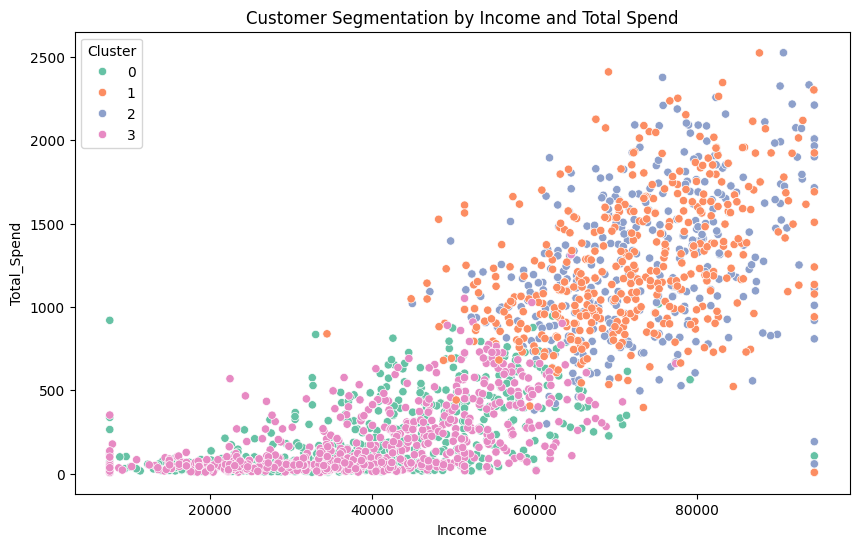

Cluster Centers:
 [[-0.6429229  -0.68000169 -0.87630866  0.31331423]
 [ 0.96466303  1.08330913  0.81189287 -0.63082923]
 [ 1.03515283  1.09060286 -0.93098108 -0.68517751]
 [-0.59795512 -0.67192322  0.84461039  0.50051041]]


In [ ]:
from sklearn.cluster import KMeans
# Create new features
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] = 2024 - df['Year_Birth']

# Display the first few rows of the updated DataFrame
print(df[['Income', 'Total_Spend', 'Children', 'Age']].head())

# Additional steps for analysis and segmentation
# 1. Correlation analysis
correlation_matrix = df[['Income', 'Total_Spend', 'Age', 'Recency', 'Children']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# 2. Visualize spending habits by marital status

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Marital_Status', y='Total_Spend', ci=None)
plt.title('Total Spending by Marital Status')
plt.xticks(rotation=45)
plt.show()

# 3. Visualize spending habits by education level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Total_Spend', ci=None)
plt.title('Total Spending by Education Level')
plt.xticks(rotation=45)
plt.show()

# 4. Clustering for customer segmentation

# Features for clustering
features = df[['Income', 'Total_Spend', 'Recency', 'Children']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spend', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation by Income and Total Spend')
plt.show()

print("Cluster Centers:\n", kmeans.cluster_centers_)


In [ ]:
# Profiling each cluster by calculating the mean of key features
cluster_profile = df.groupby('Cluster')[['Income', 'Total_Spend', 'Age', 'Recency', 'Children']].mean()
print("Cluster Profile:\n", cluster_profile)


Cluster Profile:
                Income  Total_Spend        Age    Recency  Children
Cluster                                                           
0        38489.602346   196.193871  53.350440  23.703812  1.184751
1        71648.429138  1248.693147  57.359914  72.618534  0.476293
2        73101.189468  1253.046278  56.493671  22.151899  0.435443
3        39468.911359   201.201717  54.821173  73.525036  1.327611


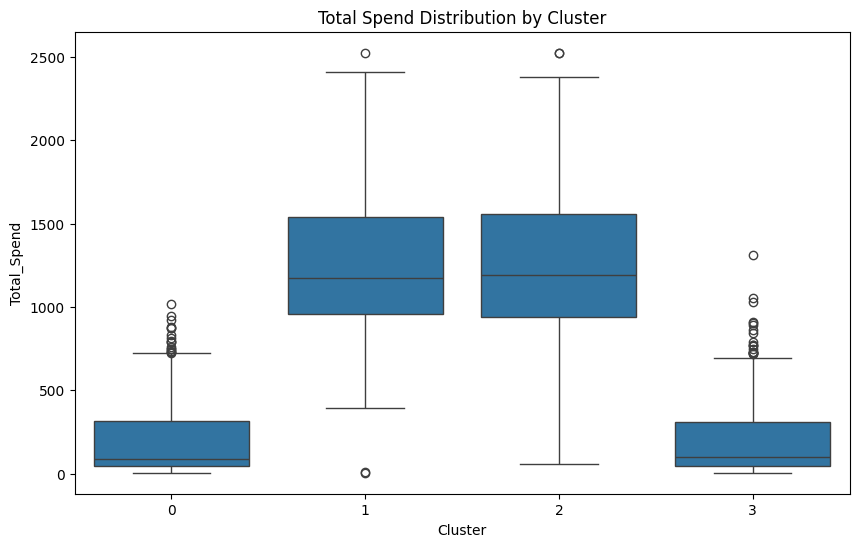

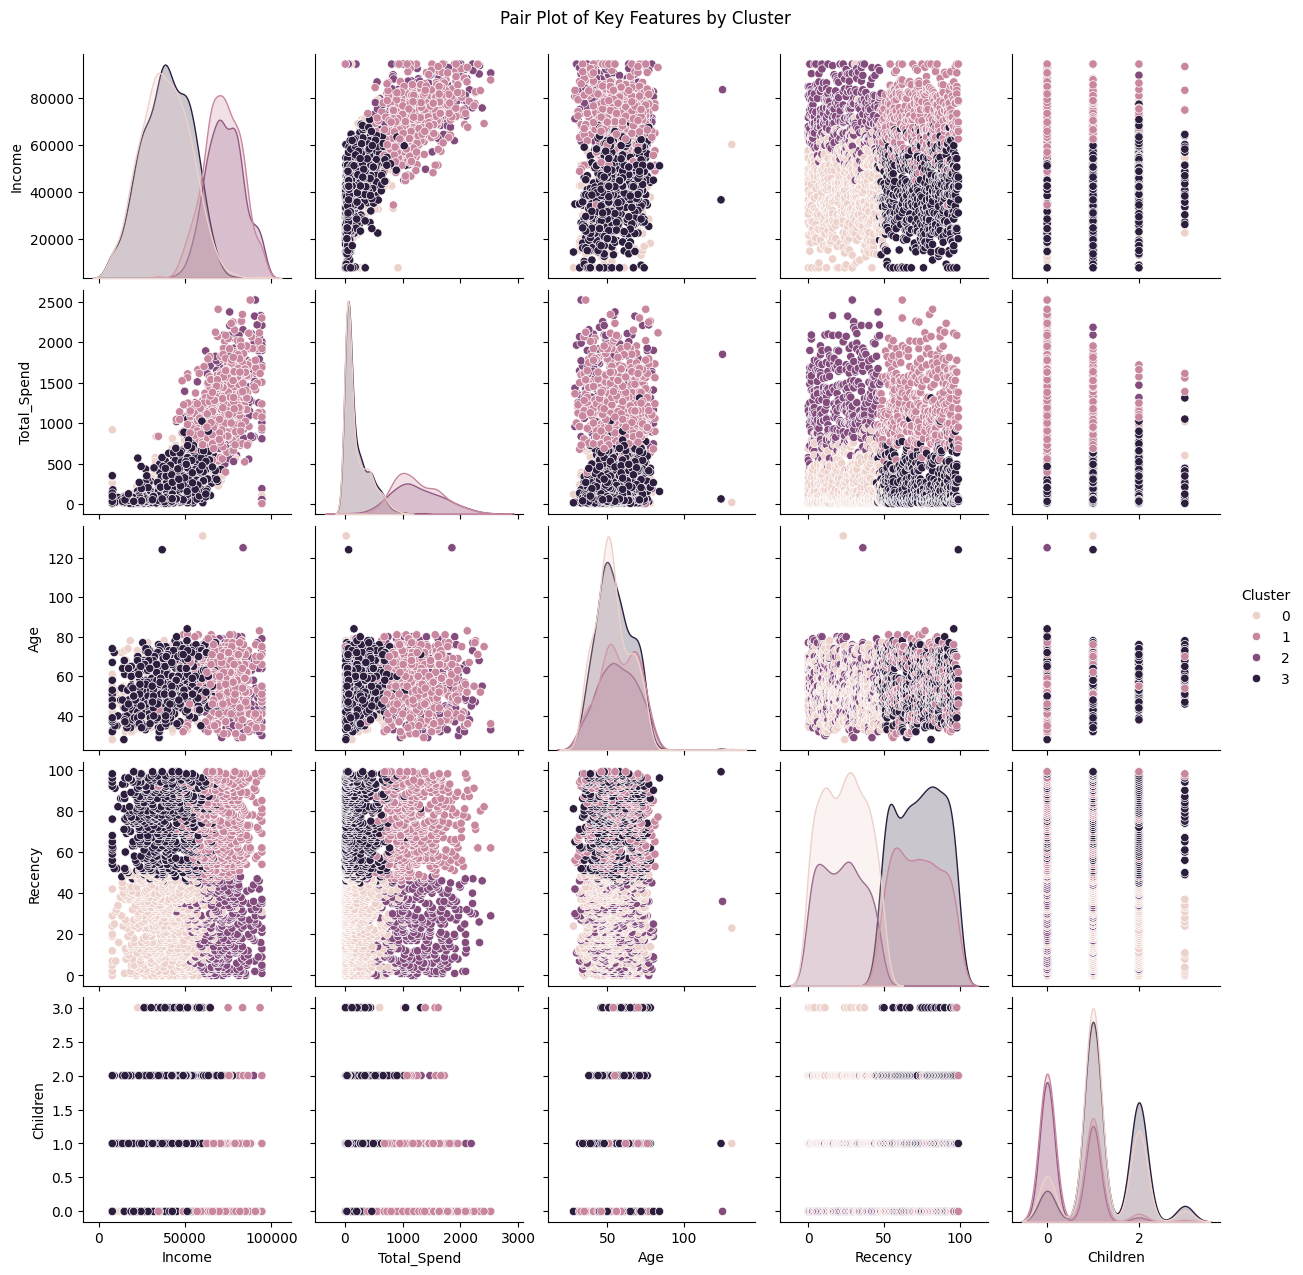

In [ ]:
# Box plot to visualize the distribution of Total_Spend for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Total_Spend')
plt.title('Total Spend Distribution by Cluster')
plt.show()

# Pair plot to visualize relationships between features for each cluster
sns.pairplot(df[['Income', 'Total_Spend', 'Age', 'Recency', 'Children', 'Cluster']], hue='Cluster')
plt.suptitle('Pair Plot of Key Features by Cluster', y=1.02)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(scaled_features, df['Cluster'])
print("Silhouette Score:", sil_score)


Silhouette Score: 0.26762067592551525


Final Observation (Brief Summary):

Cluster Profiling: The mean values of features like Income, Total_Spend, and Children will show which clusters are high spenders, which have more children, or which are the most recent in terms of purchasing behavior.

Visualization: The box plot will help assess the distribution of Total_Spend across clusters, while the pair plot will provide insights into the relationships between features within each cluster.

Silhouette Score: A high Silhouette Score (close to 1) indicates that the clusters are well-defined, while a lower score suggests the need for adjustment (e.g., changing the number of clusters).

### Conclusion and Recommendations

<ipython-input-31-15e0f8e072cd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Total_Spend', ci=None)


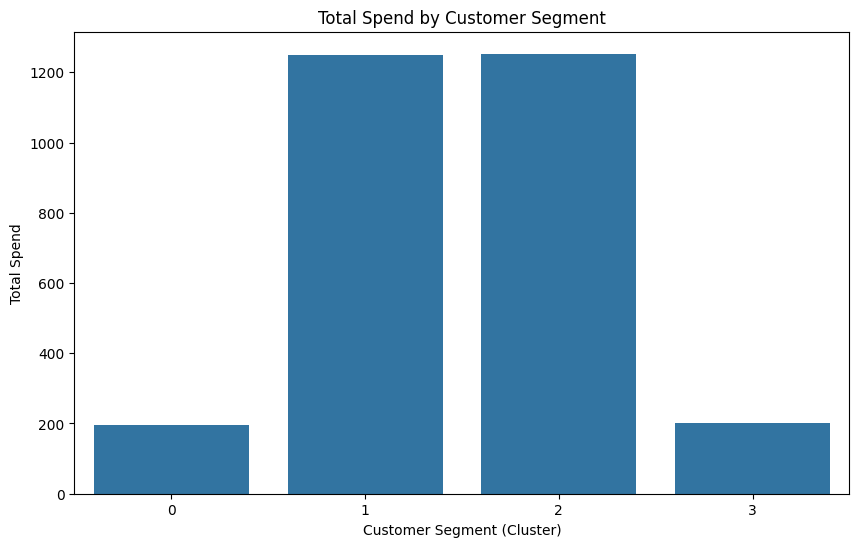

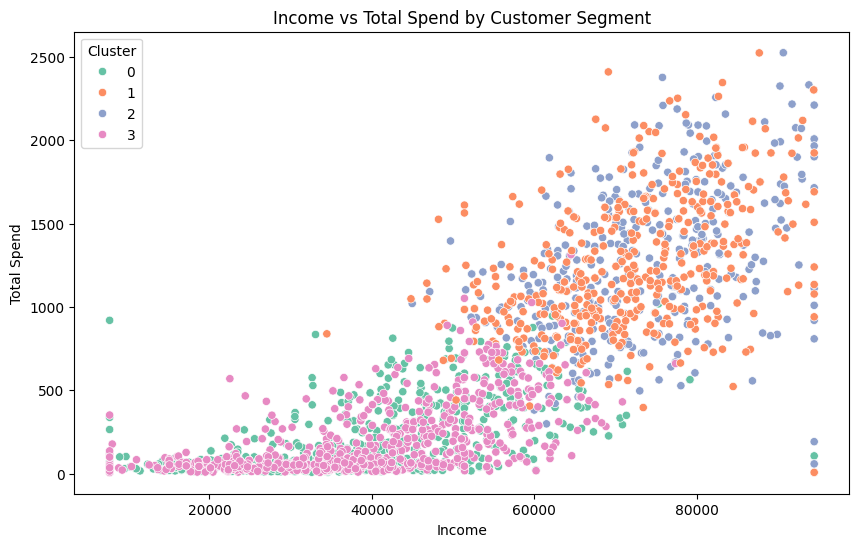

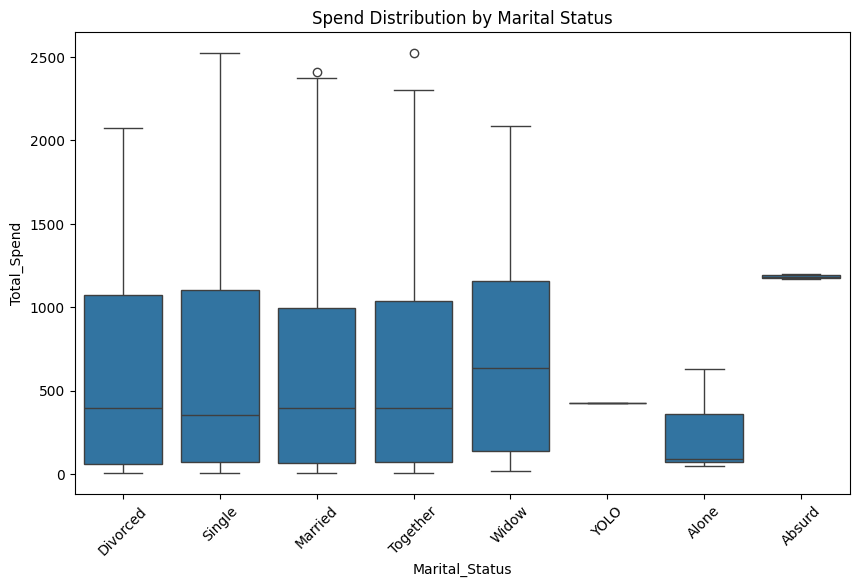

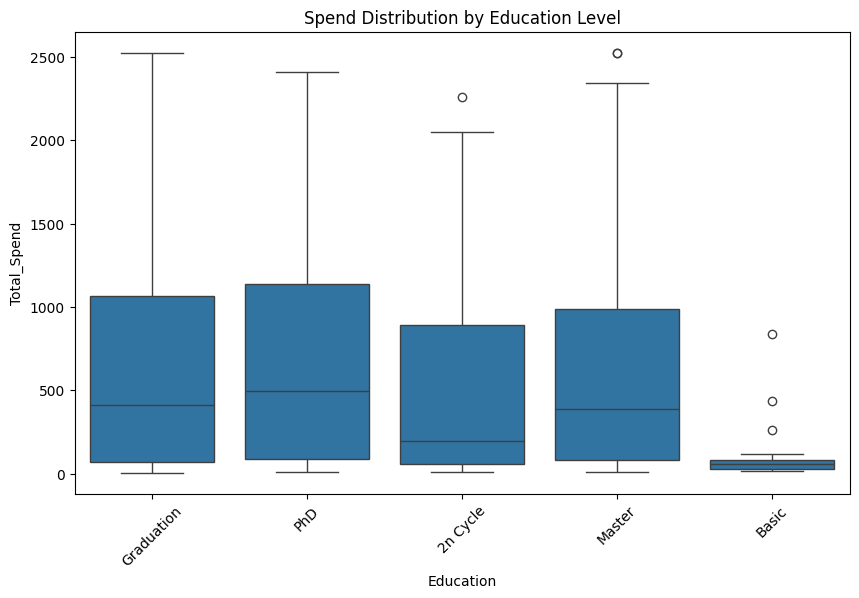

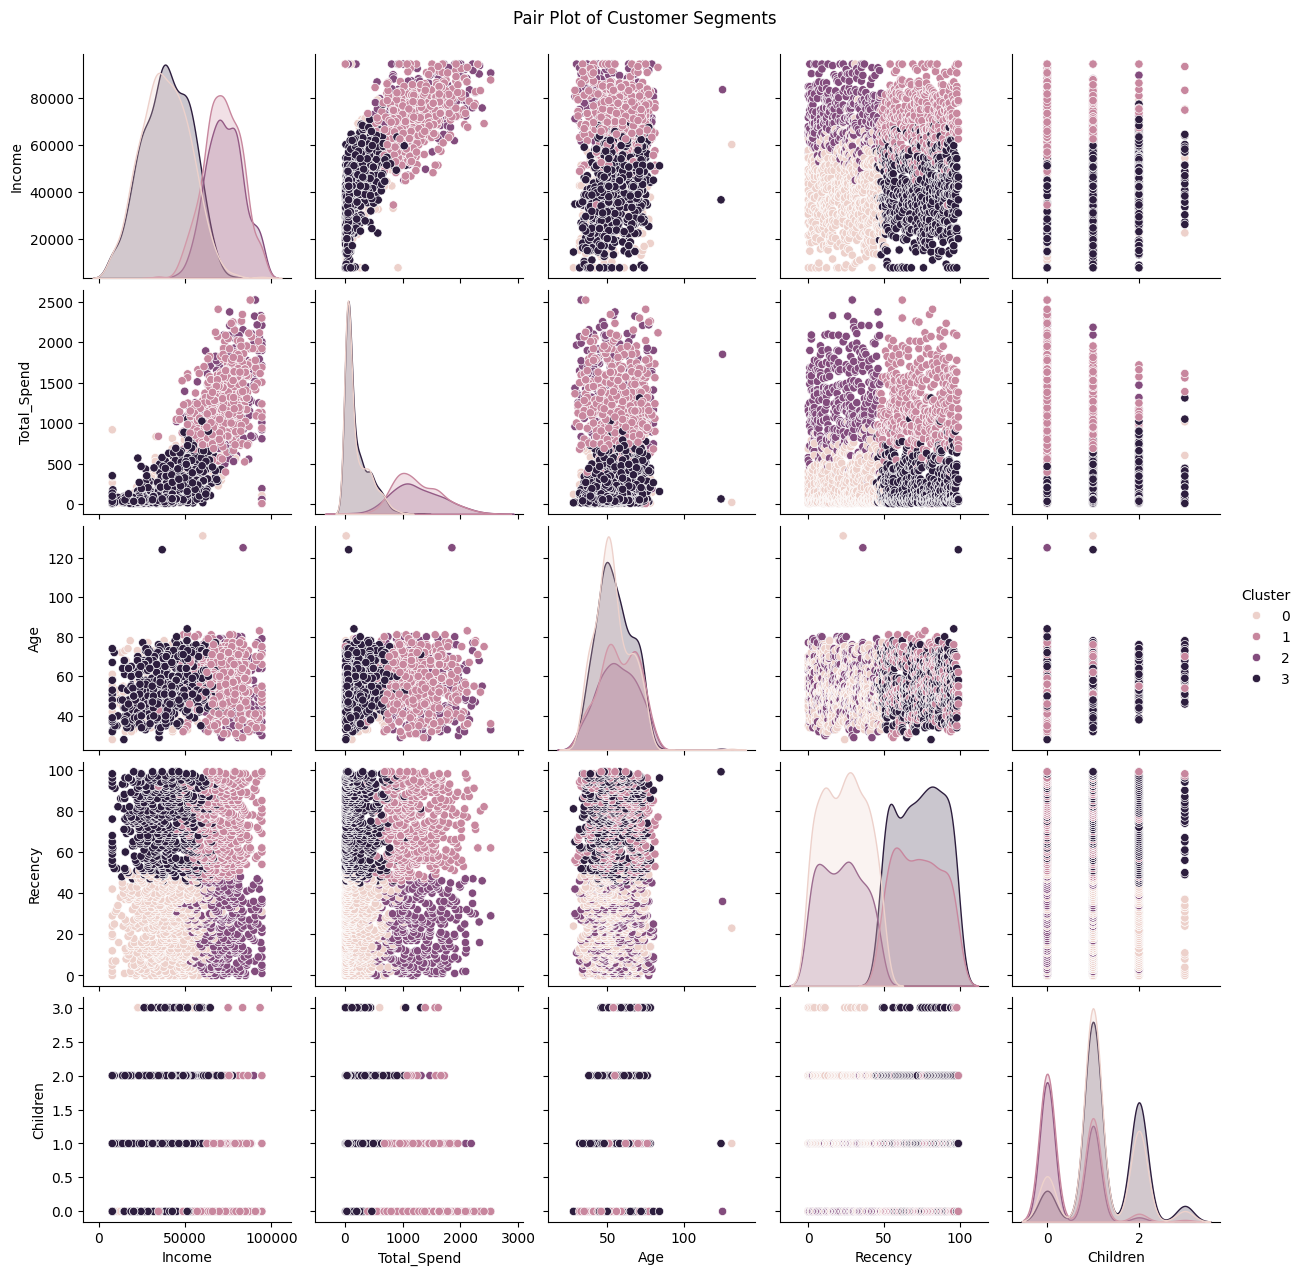

In [ ]:
# 1. Total Spend by Customer Segments (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Cluster', y='Total_Spend', ci=None)
plt.title('Total Spend by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Total Spend')
plt.show()

# 2. Income vs Total Spend (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spend', hue='Cluster', palette='Set2')
plt.title('Income vs Total Spend by Customer Segment')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.show()

# 3. Spend Distribution by Marital Status (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Total_Spend')
plt.title('Spend Distribution by Marital Status')
plt.xticks(rotation=45)
plt.show()

# 4. Spend Distribution by Education Level (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='Total_Spend')
plt.title('Spend Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

# 5. Visualizing Customer Segments (Pair Plot)
sns.pairplot(df[['Income', 'Total_Spend', 'Age', 'Recency', 'Children', 'Cluster']], hue='Cluster')
plt.suptitle('Pair Plot of Customer Segments', y=1.02)
plt.show()


### Final Observations and Recommendations:

High-Spending Customers (Cluster 1):
Customers in this cluster have high income and spend significantly.
Recommendation: Target these customers with premium products or loyalty programs, offering exclusive deals to maintain their loyalty.

Families with Children (Cluster 2):
This segment has a higher number of children, indicating a family-oriented behavior.
Recommendation: Offer family-centric products or promotions such as discounts on bulk items or family packs.

Recent Buyers (Cluster 3):
Customers in this cluster are recent buyers and tend to have a moderate level of spending.
Recommendation: Use personalized email campaigns and product recommendations to encourage repeat purchases.

Low-Spending Customers (Cluster 4):
Customers in this segment have lower spending patterns.
Recommendation: Introduce low-cost products or seasonal promotions to increase spending. Offer them incentives to increase engagement.